# Scrapfly Screenshot API

Hi, this is a quick introduction to Scrapfly Screenshot API. 
This API provides an ability to take screenshots of any website and any part of the websites through Scrapfly's cloud web browser.

[View the introduction video on youtube](https://www.youtube.com/watch?v=1Y-XvvWlyzk)

It's designed to be powerful and super simple allow for seemless visual data collection. 
In this short intro we'll take a look at how to use it and it's core capabilities through example.

## Access in any HTTP client

The screenshot API can be accessed in any HTTP client like `cURL` or `fetch` or any HTTP library. For example in this video, we'll be using Python's `httpx` but they are very simple so you can easily follow along in any client.

To start, make sure to grab your API key from the Scrapfly dashboard.

Then we can setup an HTTP client with some default values.

In this case we want to increase the default timeout as some screenshots can take a few seconds. 
Optionally, we can set the accept-encoding header to `gzip` value to receive gzipped screenshots and that will save a lot of bandwidth.

Finally, the key paramater contains your API key you retreived from your dashboard

In [14]:
import httpx
from pathlib import Path
from IPython import display


client = httpx.Client(
    # tip: raise min timeout if you're scraping heavy pages
    timeout=60,  
    headers={
        # tip: save bandwidth with gzip
        'accept-encoding': 'gzip',  
    },
    params={
        # every requests needs to authenticate with key parameter
        "key": "scp-test-14644f57089d47c0aeb705b776792366", 
    }
)
client

## Basic screenshots

With that set, let's start by taking a basic screenshot. In this video we'll be using web-scraping.dev website for our example.

to start capturing all we have to do is call the screenshot API endpoint as a GET request with the url parameter set to the page we want to capture. Here we're capturing the product/1.

On the right, we see the exact API url we used which captured a screenshot of our product. Now, this is exactly what a default web browser page would see but we can do a bit more.

One important note here is that as with all API url parameters the `url` parameter needs to be url encoded to transfer correctly.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=http%3A%2F%2Fweb-scraping.dev%2Fproduct%2F1


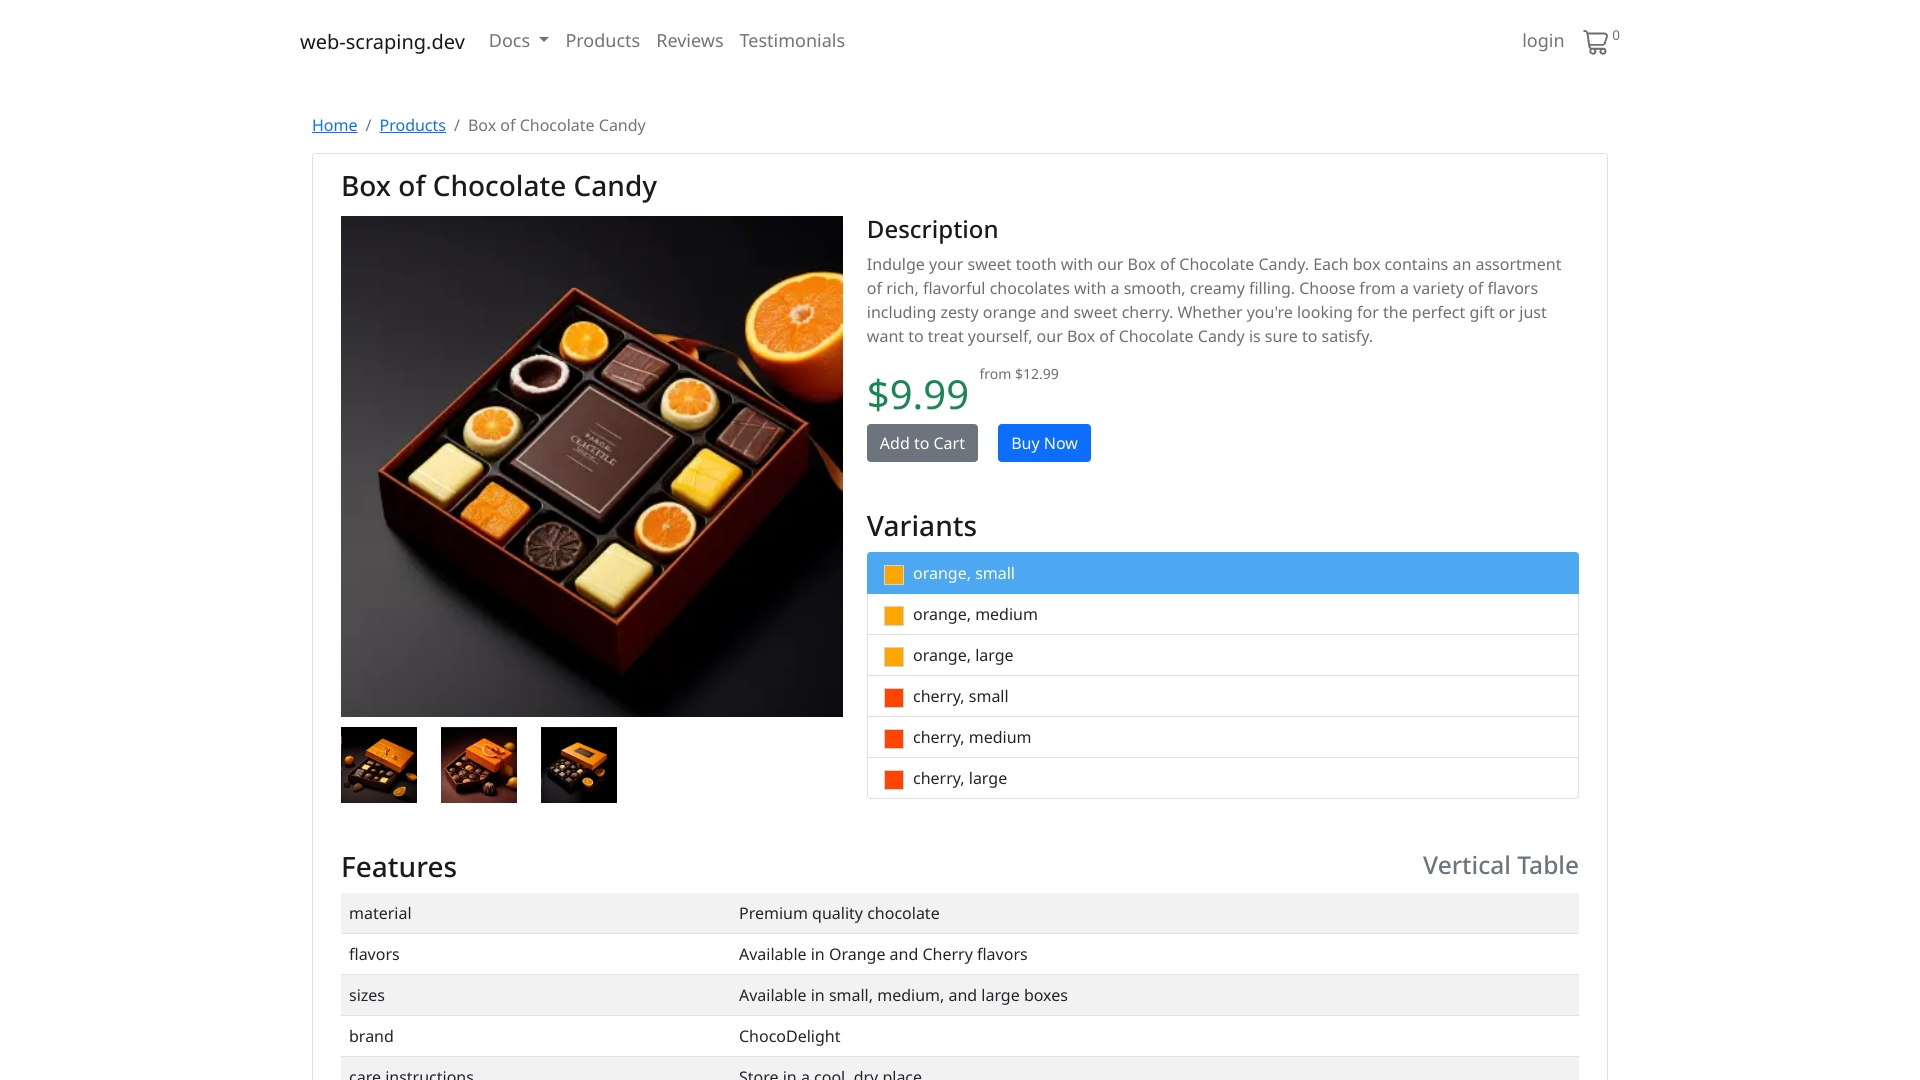

In [15]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "http://web-scraping.dev/product/1",
    }
)
print(resp.url)
display.Image(resp.content)

## Full page capture

We can use the `capture` parameter to capture the entire page screen beyond the browser's viewport.
Here, we specify `capture` parameter as `fullpage` and this captures the entire website's view rather than just the default viewport.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=http%3A%2F%2Fweb-scraping.dev%2Fproduct%2F1&capture=fullpage


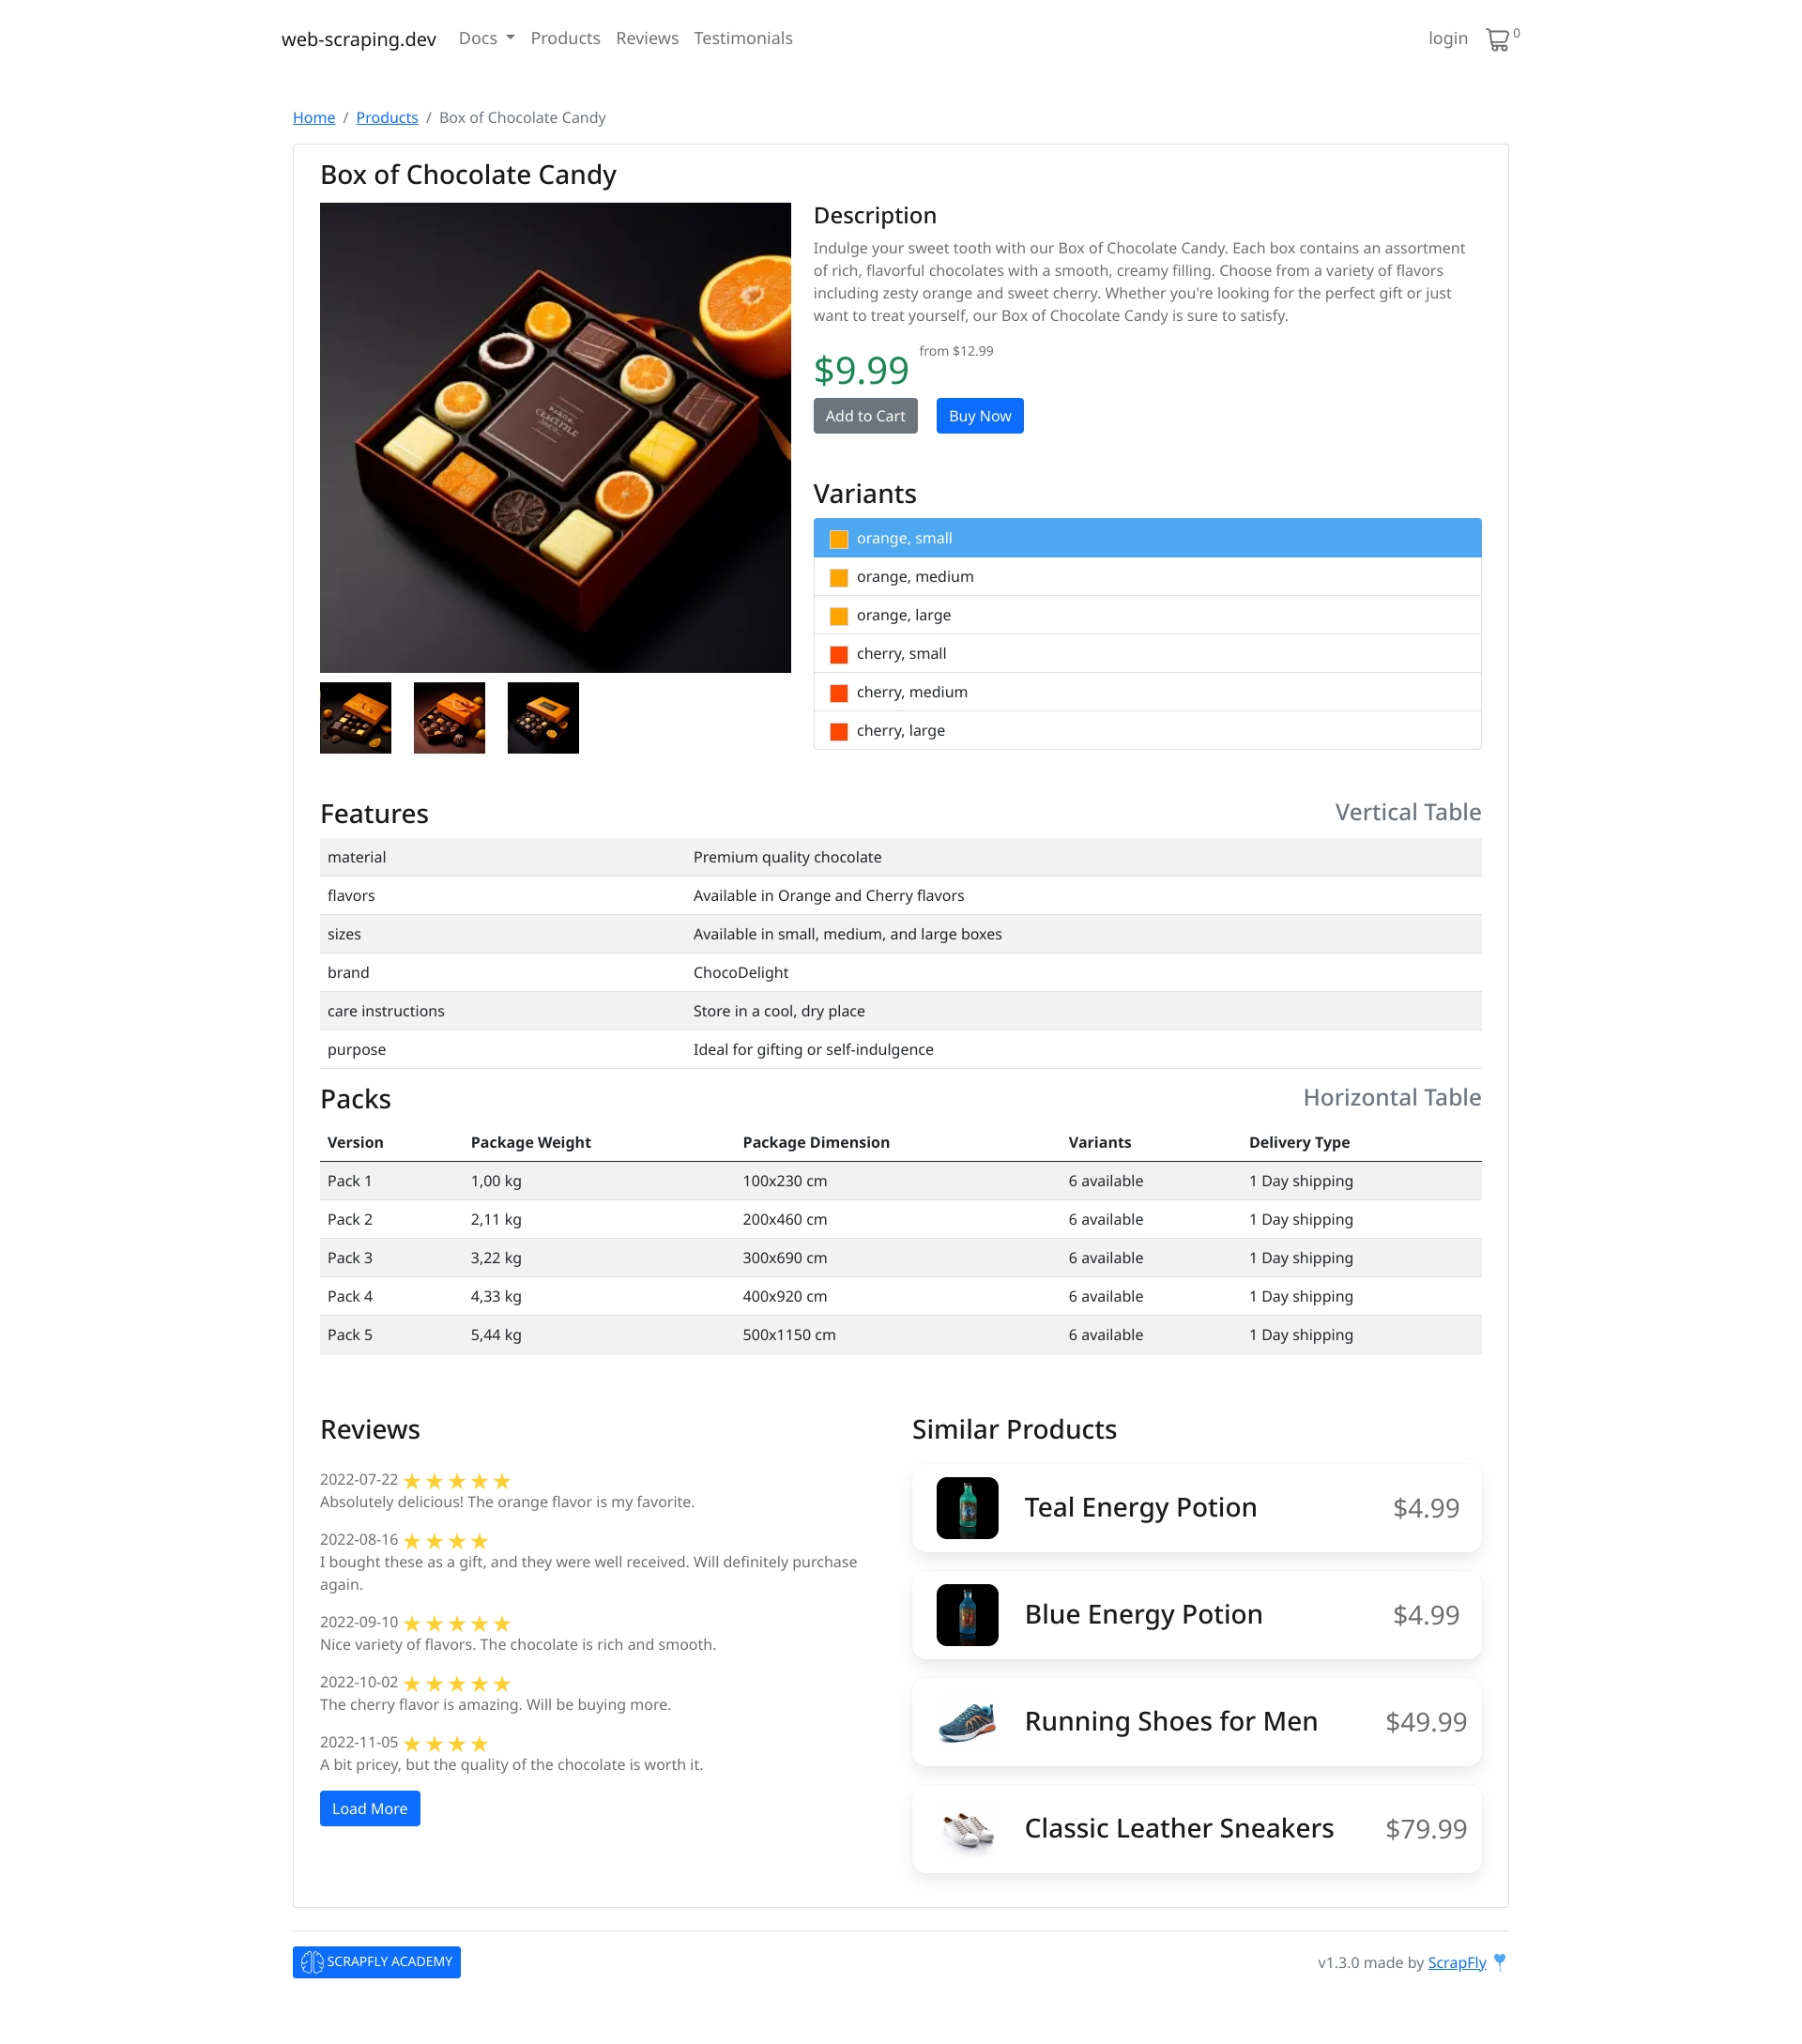

In [17]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "http://web-scraping.dev/product/1",
        # "fullpage" captures everything
        "capture": "fullpage",  
    }
)
print(resp.url)
display.Image(resp.content)

## Different Resolution

So, by default Scrapfly captures in 1920x1080 resolution which the most common browser resolution. However,
sometimes we might need to view the page in different viewports like that of a smartphone or a table.
For that, can use the `resolution` parameter to specify any viewport resolution. For example if we want to capture smarphone views we'd use something more vertical like in this example we're using 540 times 1200. This generates a screenshot a smartphone would see

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=http%3A%2F%2Fweb-scraping.dev%2Fproduct%2F1&capture=fullpage&resolution=540x1200


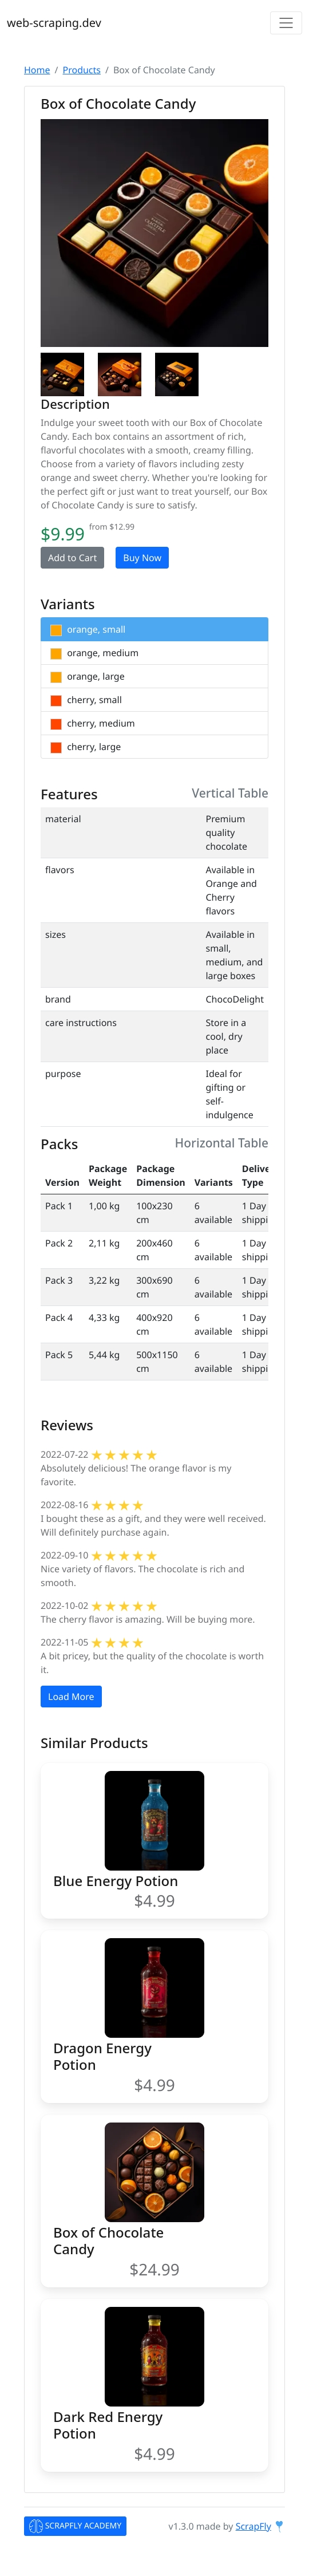

In [21]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "http://web-scraping.dev/product/1",
        "capture": "fullpage",  
        # any custom viewport resolution can be used
        # to simulate different screen types
        "resolution": "540x1200",  
    }
)
print(resp.url)
display.Image(resp.content)

## Capture elements
The capture parameter can be used to capture only specific parts of the website. For this we can use XPath or CSS selectors to target some parts of the page exclusivley. 

For example, to capture the reviews section of our product page. First, we have identify the element using browser tools and here we can see that it's under element with id "reviews". So we can use an "id reviews" css selector to capture this element.

To ensure that capture happens after the reviews have loaded we can also tell Scrapfly to wait for this element to appear on screen using wait_for_selector parameter.

This results in a clean capture of only the data that interests us.

In [1]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://web-scraping.dev/product/1",
        # wait for page to load this element
        "wait_for_selector": "#reviews",
        # use xpath or css selectors to capture elements
        "capture": "#reviews", 
    }
)

print(resp.url)
display.Image(resp.content)

NameError: name 'client' is not defined

## Javascript Execution

Next some pages can be very dynamic and difficult to capture visually. For that Screenshot API runs full real web browsers that can execute custom javascript to click buttons or trigger other page events to generate the exact view you want. Here, we're using javascript to click the "load more reviews" button to load all reviews before we capture the screenshot.

Note that javascript has to be urlsafe b64encoded to correctly transfer data to Scrapfly.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=https%3A%2F%2Fweb-scraping.dev%2Fproduct%2F1&wait_for_selector=%23reviews&js=ZG9jdW1lbnQucXVlcnlTZWxlY3RvcignYnV0dG9uI2xvYWQtbW9yZS1yZXZpZXdzJykuY2xpY2soKQ%3D%3D&rendering_wait=1000&capture=%23reviews


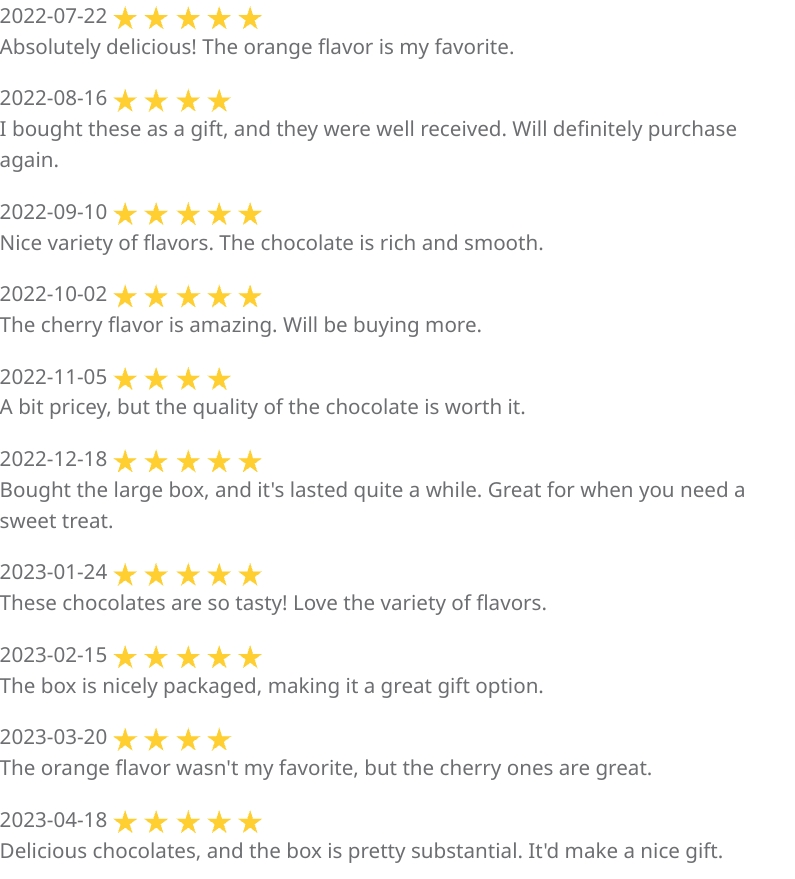

In [23]:
from base64 import urlsafe_b64encode

javascript = """
document.querySelector('button#load-more-reviews').click()
"""
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://web-scraping.dev/product/1",
        "wait_for_selector": "#reviews",
        "js": urlsafe_b64encode(javascript.encode()).decode(),
        "capture": "#reviews", 
    }
)


print(resp.url)
display.Image(resp.content)

## Automatic Scrolling

For pages that require scrolling the `auto_scroll` parameter can be used to scroll the browser to the bottom of the page. This is a great tool for capturing endless paging elements like the example below.

Here we can see that the auto_scroll feature scrolled the page to the bottom which has loaded all of the items on the page.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=https%3A%2F%2Fweb-scraping.dev%2Ftestimonials&capture=fullpage&auto_scroll=true


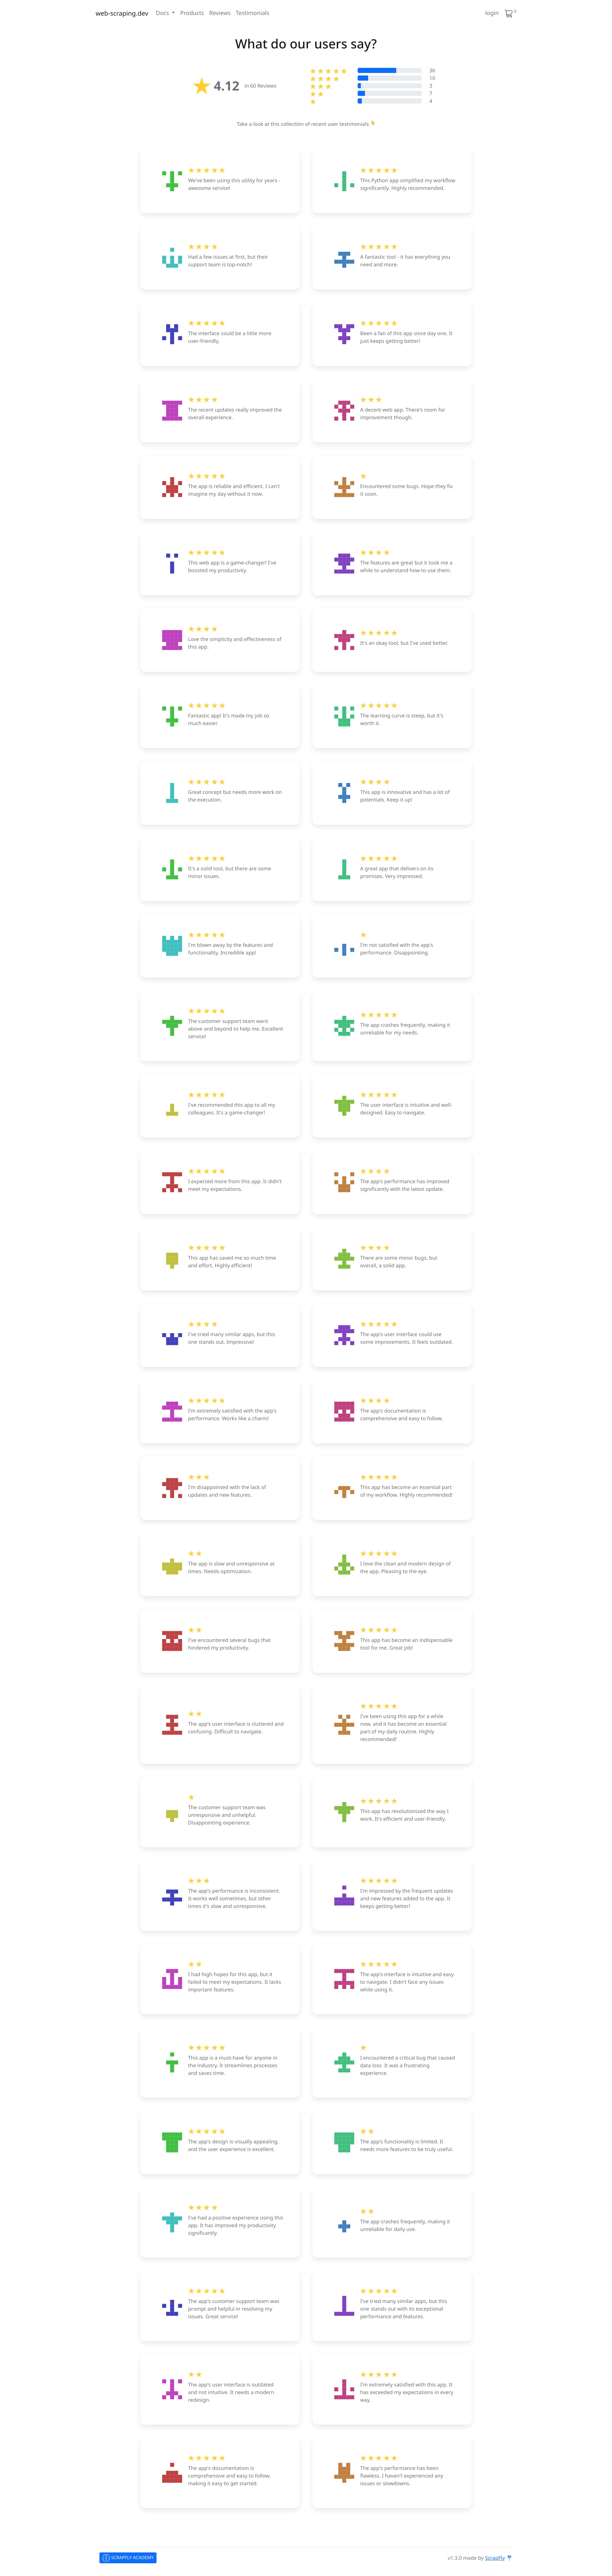

In [24]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://web-scraping.dev/testimonials",
        "capture": "fullpage", 
        "auto_scroll": "true",
    }
)

print(resp.url)
display.Image(resp.content)

## Using Options to modify capture

The `options` parameter can be used to apply common convenience modifiers like closing cookie banners and anything that blocks the actual website view.

For this the block_banners option can be used which will remove the view blocking banners and modals.

Here the block_banners option removed the cookie banner before capturing the screenshot.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=https%3A%2F%2Fwww.web-scraping.dev%2Flogin%3Fcookies&capture=fullpage&options=block_banners


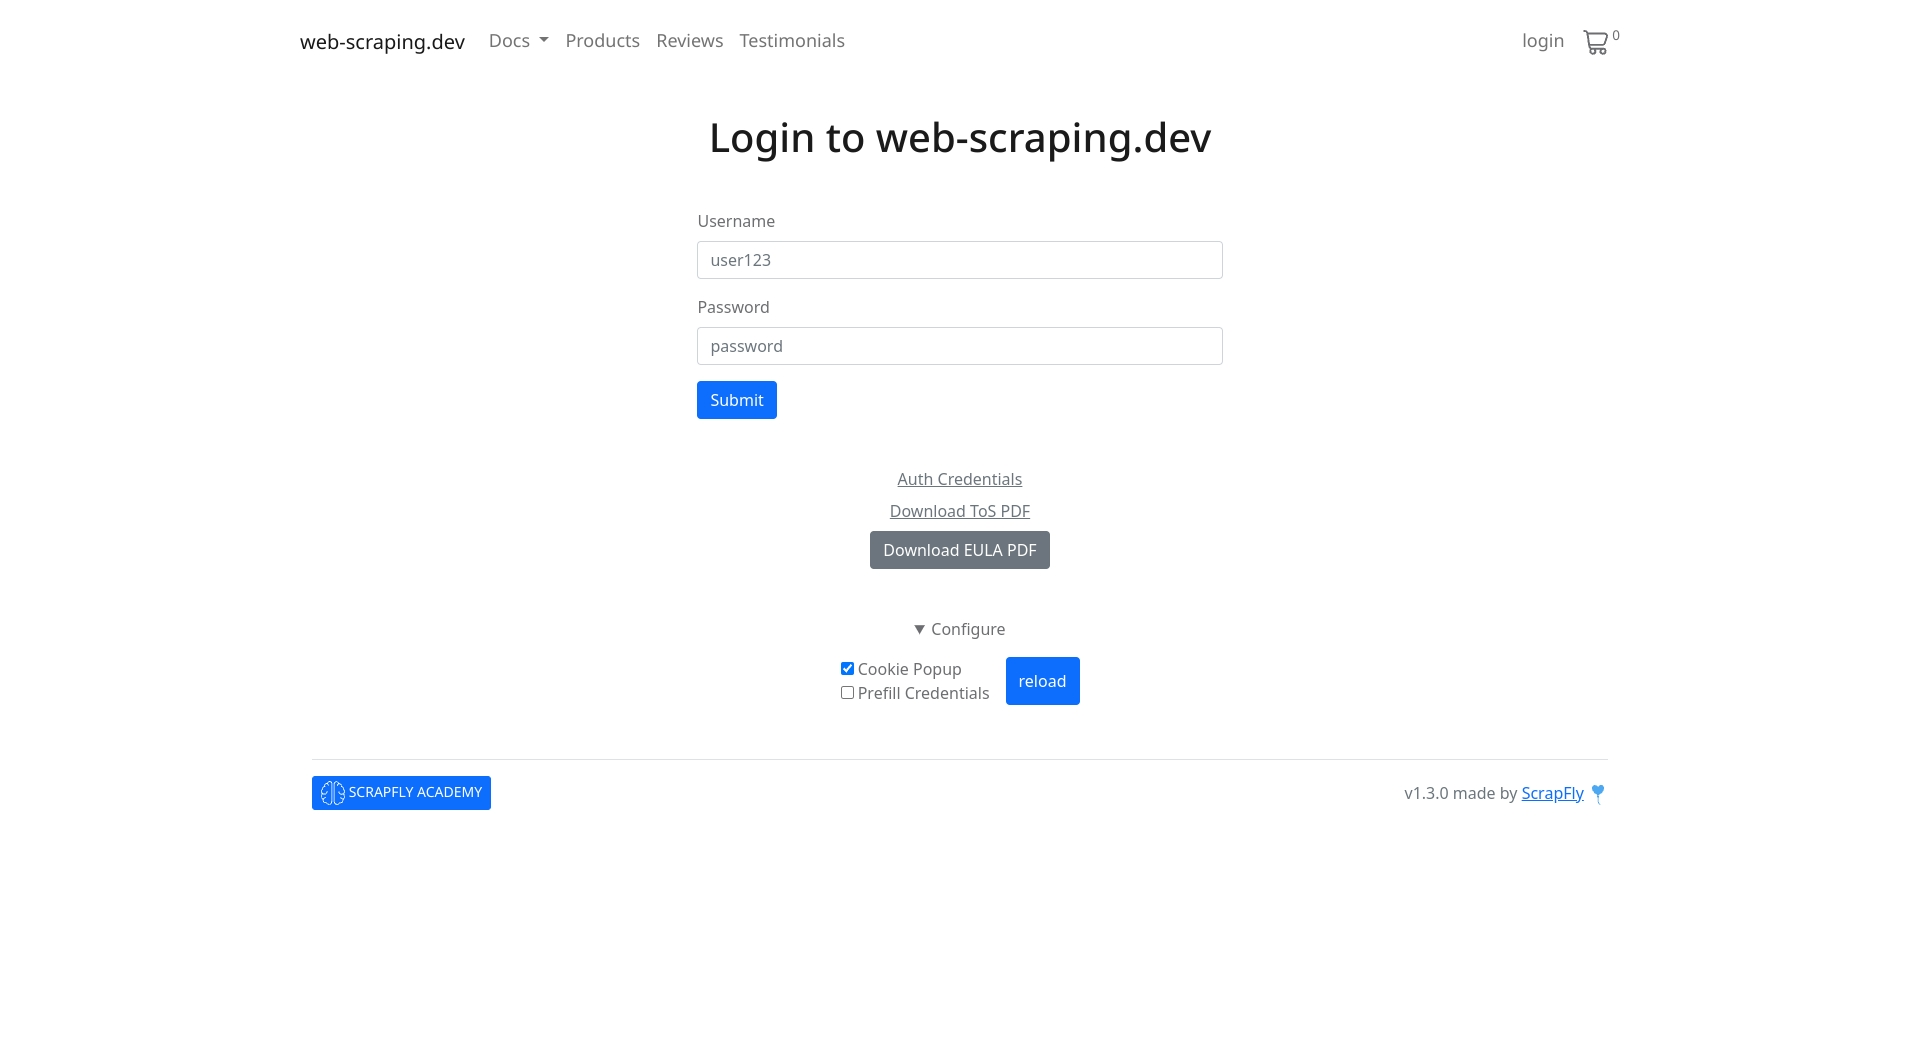

In [28]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://www.web-scraping.dev/login?cookies",
        "capture": "fullpage",
        "options": "block_banners",
    }
)

print(resp.url)
display.Image(resp.content)

Another popular option is the "dark_mode" option which will apply dark theme settings for any page if possible.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=https%3A%2F%2Fwww.web-scraping.dev%2Fproduct%2F1&capture=fullpage&options=dark_mode


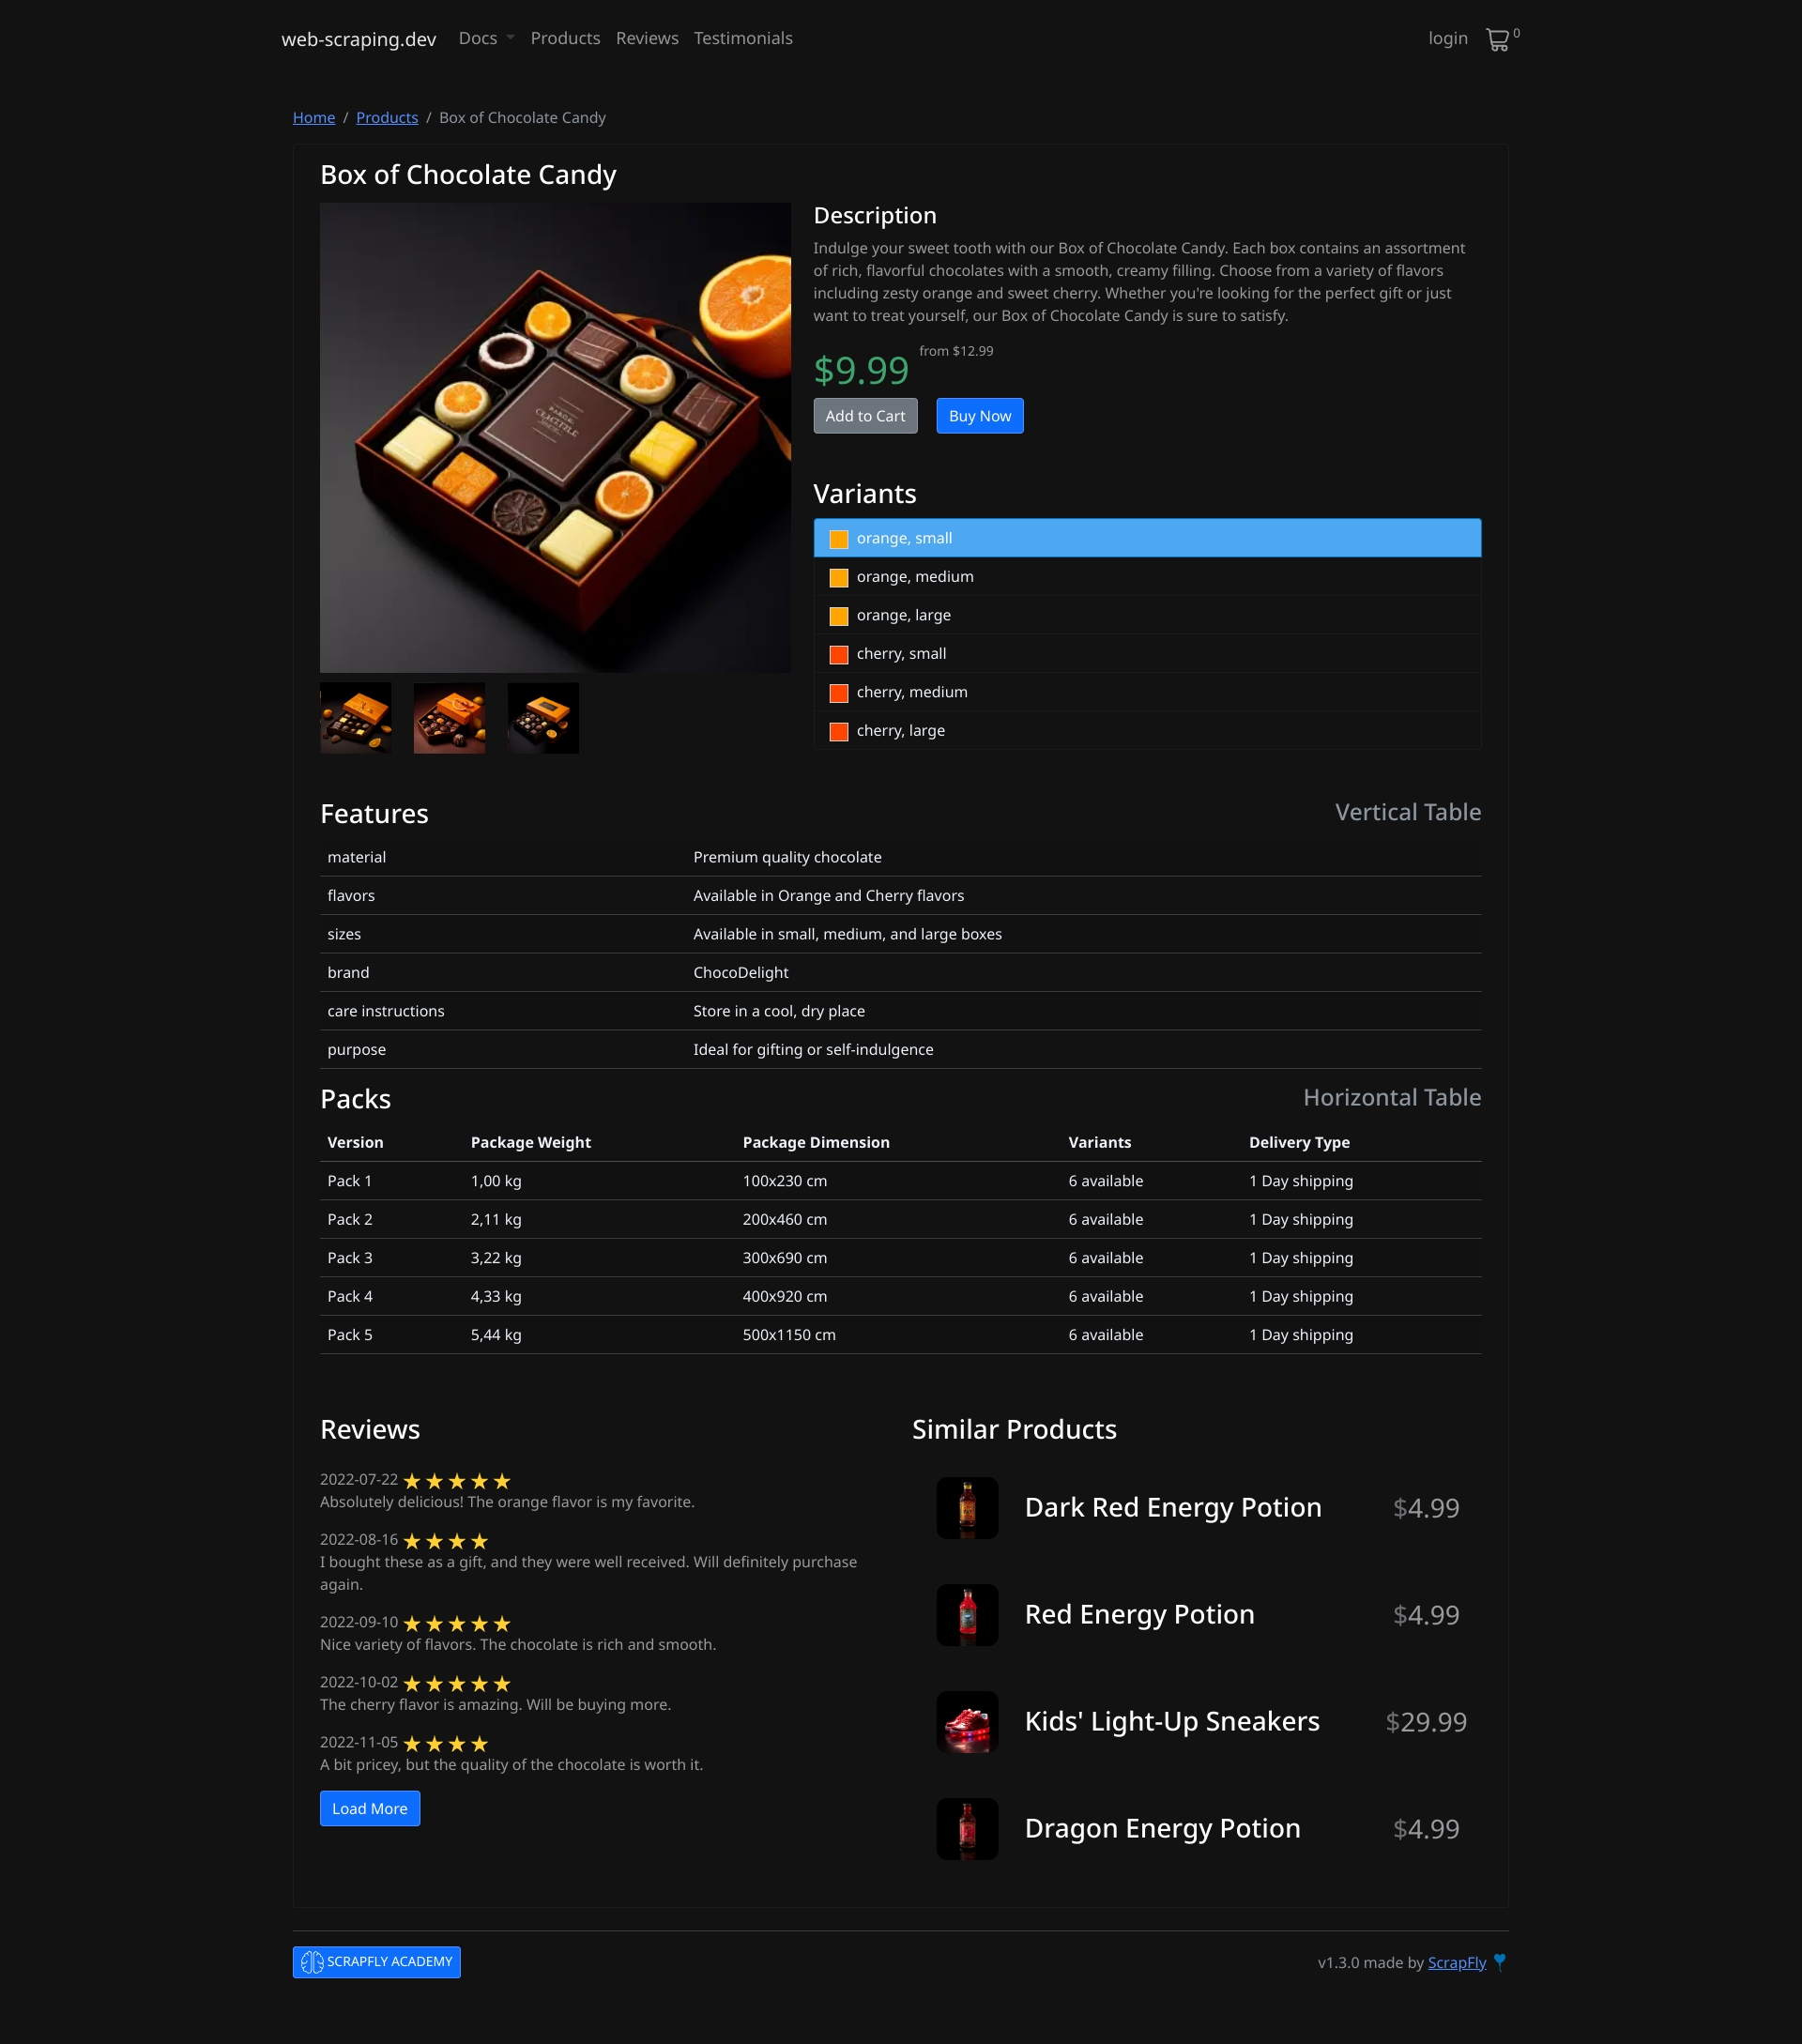

In [29]:
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://www.web-scraping.dev/product/1",
        "capture": "fullpage",
        "options": "dark_mode",
    }
)

print(resp.url)
display.Image(resp.content)

## Using Server Cache

Like most Scrapfly requests screenshot API requests can also be used with cache stored on Scrapfly servers. This makes repeated requests almost instant which is great for direct high-volume application integration or development.

https://api.scrapfly.io/screenshot?key=scp-test-14644f57089d47c0aeb705b776792366&url=https%3A%2F%2Fwww.web-scraping.dev%2Fproduct%2F1&cache=true&cache_ttl=3600
elapsed: 1.9s


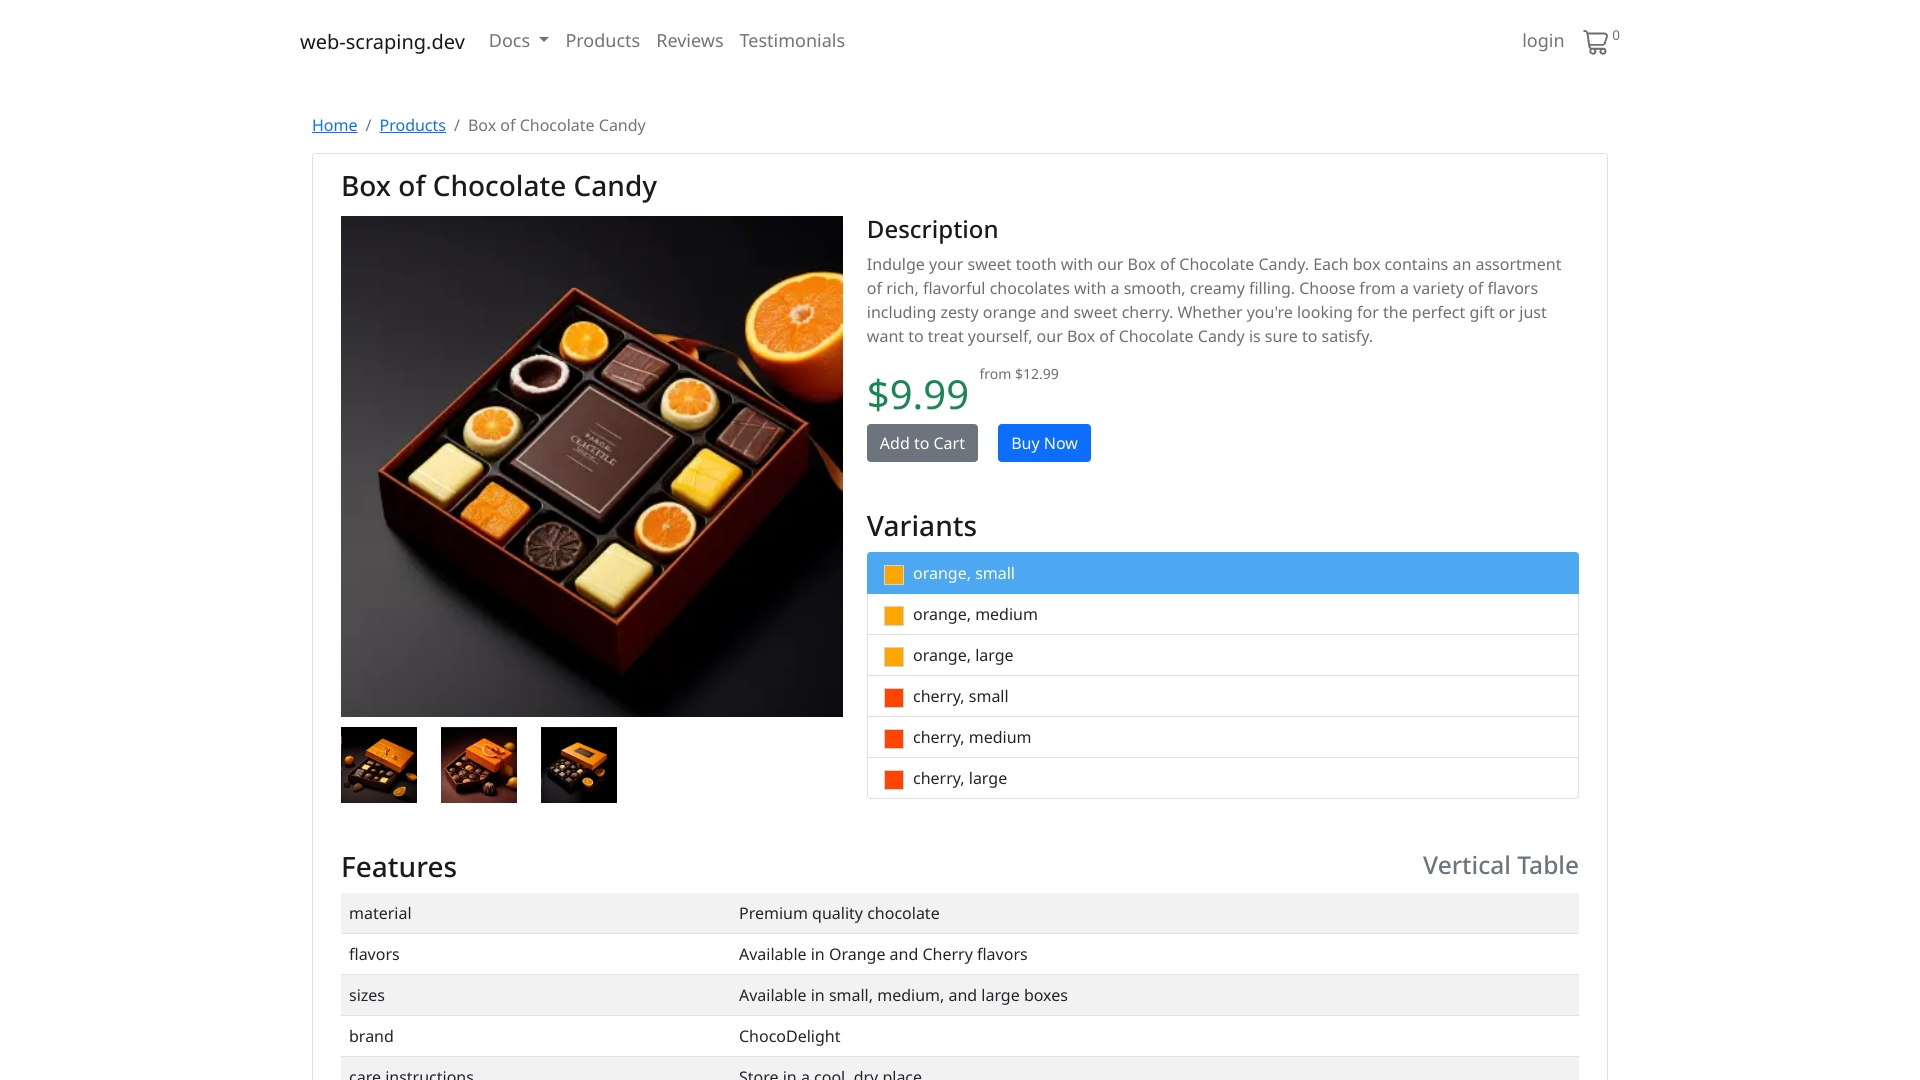

In [49]:
from time import time
_start = time()
resp = client.get(
    'https://api.scrapfly.io/screenshot', 
    params={
        "url": "https://www.web-scraping.dev/product/1",
        # to enable cache:
        "cache": "true",
        # optional lifespan:
        "cache_ttl": 3600,  # keep for 1hour (default 24h)
        # to force cache reset
        # "cache_clear": "true",  
    }
)

print(resp.url)
print(f"elapsed: {time()-_start:.1f}s")
display.Image(resp.content)

Finally, we have [a web player](https://scrapfly.io/dashboard/player) which you can use to try out these examples yourself. 
You can also see the github link in the description for the examples used in this video.







